In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("dataset_heart.csv")

In [4]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sex '}>,
        <Axes: title={'center': 'chest pain type'}>,
        <Axes: title={'center': 'resting blood pressure'}>],
       [<Axes: title={'center': 'serum cholestoral'}>,
        <Axes: title={'center': 'fasting blood sugar'}>,
        <Axes: title={'center': 'resting electrocardiographic results'}>,
        <Axes: title={'center': 'max heart rate'}>],
       [<Axes: title={'center': 'exercise induced angina'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST segment'}>,
        <Axes: title={'center': 'major vessels'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'heart disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

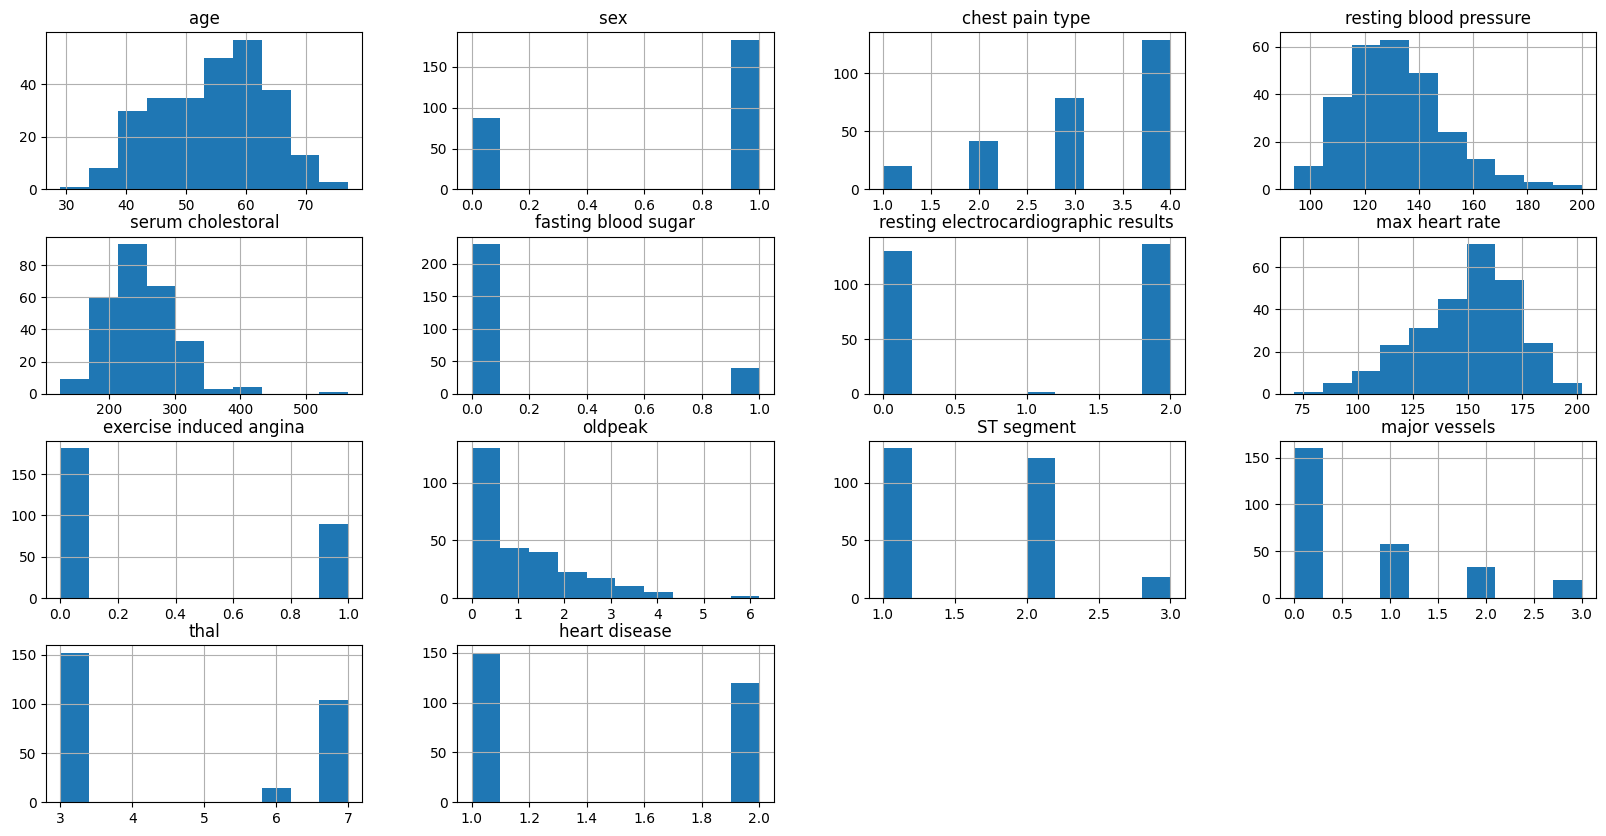

In [6]:
%matplotlib inline
df.hist(figsize=(20, 10))

In [15]:
df.shape

(270, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [34]:
df["heart disease"] = df["heart disease"].replace({1: 0, 2: 1})

In [48]:
df.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

<Axes: >

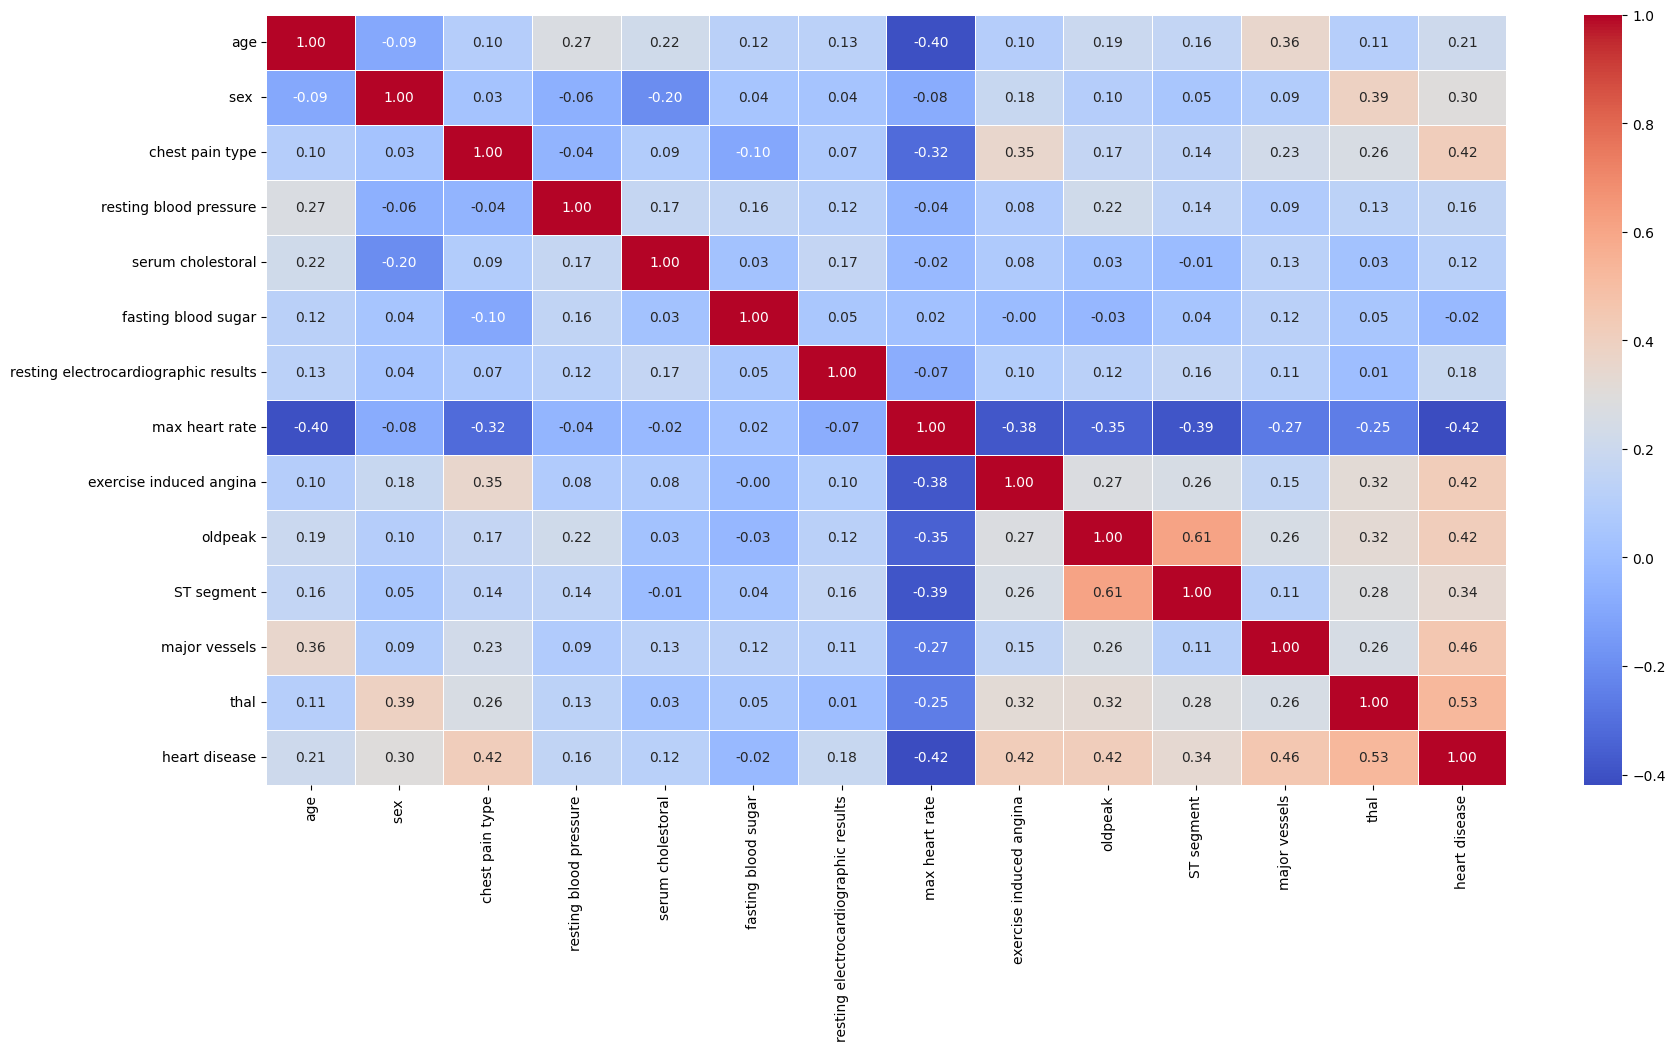

In [47]:
df_numerical = df.select_dtypes(include=['number'])

# Calculate correlation
corr_matrix = df_numerical.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
linewidths=0.5)

In [35]:
y = df['heart disease']
X = df.drop(columns='heart disease')

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [58]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [59]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb_ = XGBClassifier()

In [60]:
a = [dtc, rfc, xgb_]

In [61]:
for i in a:
  scores = cross_val_score(i, X, y, cv=skf, scoring = "accuracy")
  print("Cross-Validation Scores for each fold:", scores)
  print("Mean Cross-Validation Score:", np.mean(scores))
  print("Standard Deviation of Cross-Validation Score:", np.std(scores))

Cross-Validation Scores for each fold: [0.7037037  0.66666667 0.61111111 0.74074074 0.72222222]
Mean Cross-Validation Score: 0.6888888888888889
Standard Deviation of Cross-Validation Score: 0.04596175424441056
Cross-Validation Scores for each fold: [0.77777778 0.92592593 0.75925926 0.77777778 0.88888889]
Mean Cross-Validation Score: 0.825925925925926
Standard Deviation of Cross-Validation Score: 0.06789001029564205
Cross-Validation Scores for each fold: [0.7962963  0.88888889 0.7037037  0.74074074 0.87037037]
Mean Cross-Validation Score: 0.8
Standard Deviation of Cross-Validation Score: 0.07162622076227301


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=9)
from sklearn.model_selection import GridSearchCV
param_grid = {
 'n_estimators': [100, 200, 300],
 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid,
cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_estimator_ 

RandomForestClassifier(max_depth=20)

In [64]:
rfc = RandomForestClassifier(max_depth=20)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_score

0.9074074074074074